# Gas Cloud
In this activity you will create your own word clouds using a subset of the Reuters corpus. 

In [190]:
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
import pandas as pd
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Code to download corpora
# import nltk
# nltk.download('reuters')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

In [10]:
# Get reuters stories where categories='gas'
ids = reuters.fileids(categories='gas')
corpus = [reuters.raw(i) for i in ids]
big_string = ' '.join(corpus)

In [9]:
sw = set(stopwords.words('english'))
sw_addon = {'said', 'mln', 'kilolitres','kl', 'also', 'could','would'}
sw_union = sw.union(sw_addon)

In [141]:
# Generate function to preprocess corpus for wordcloud creation
def process_text(article, swu):
    regex = re.compile("[^a-zA-Z ]")
    reg_clean = regex.sub('', article)
    t_word=word_tokenize(reg_clean)
    first_pass= [word.lower() for word in t_word if word.lower() not in swu]
    txt_out = [lemmatizer.lemmatize(word, pos='a') for word in first_pass if len(word)>2]
    return txt_out

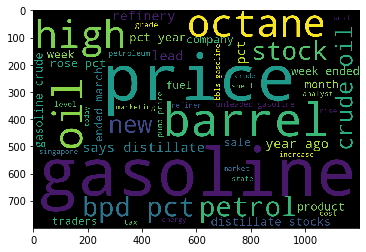

In [13]:
# Create wordcloud
input_text = ' '.join(process_text(big_string, sw_union))
wc= WordCloud(width=1200, height=800, max_words=50).generate(input_text)
plt.imshow(wc)

## Challenge

In [156]:
from nltk.util import bigrams, ngrams

In [208]:
# Generate function to preprocess corpus for bigram wordclouds
#bigram_counts = Counter(ngrams(tokenized_article, n=2))
bigrams_list = Counter(ngrams(process_text(big_string, sw_union), n=2))
bgram_list = [' '.join(tup) for tup in bigrams_list]
frequency_list = [int(p) for p in bigrams_list.values()]
bigram_df = pd.DataFrame(list(zip(bgram_list, frequency_list)), columns=['bigram', 'frequncy'])
#bigram_df.head()
freq_dict={'bigram_list': bgram_list, 'frequency_list':frequency_list}

In [207]:
bg_cloud= WordCloud(width=1200, height=800, max_words=50, collocations=False).generate_from_frequencies(freq_dict)
plt.imshow(bg_cloud)

TypeError: '<' not supported between instances of 'str' and 'int'

In [198]:
[p for p in bigrams_list.values()]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 11,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 17,
 19,
 6,
 2,
 18,
 7,
 2,
 3,
 3,
 6,
 3,
 3,
 3,
 1,
 18,
 3,
 3,
 8,
 3,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 2,
 3,
 2,
 2,
 10,
 5,
 8,
 2,
 2,
 6,
 22,
 9,
 4,
 8,
 2,
 2,
 11,
 3,
 4,
 3,
 4,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 10,
 11,
 19,
 20,
 5,
 5,
 5,
 5,
 1,
 7,
 5,
 10,
 5,
 6,
 6,
 4,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 5,
 10,
 5,
 11,
 5,
 12,
 29,
 12,
 5,
 7,
 8,
 8,
 1,
 2,
 